In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.9)

# EXAM - AI

## Welcome to the AI Exam !!! 

## First of all I wish you the best of luck !!! 

You have three hours to complete this exam, it's open Internet and open books, you can use any material that you have available or that exist in the Internet. Howerver, you cannot communicate with nobody during the exam, any communication will be penalized with a NO-PASS grade. Please keep this in mind. 

You have to submit the jupyter notebook and a printout of the Jupyter notebook in pdf format to the submission box in the Moodle. Please remember that the easiest way to get a pdf printout is simply printing the web page with a "Destination PDF" or "Save as PDF" depending on the browser that you use. 

Before continuing, please rename your notebook adding your name after "EXAM-AI" in the form "EXAM-AI-EsteveAlmirall" with camel capitalization (first name and last name capitalized without spaces). 

Once this is done, reopen and fill the next cell with your first name and last name. Then you can start. 


In [2]:
_l=[print(" "*i*2+"Good Luck !!!") for i in range(10)]
_l=[print(" "*(9-i)*2+"Good Luck !!!") for i in range(10)]

Good Luck !!!
  Good Luck !!!
    Good Luck !!!
      Good Luck !!!
        Good Luck !!!
          Good Luck !!!
            Good Luck !!!
              Good Luck !!!
                Good Luck !!!
                  Good Luck !!!
                  Good Luck !!!
                Good Luck !!!
              Good Luck !!!
            Good Luck !!!
          Good Luck !!!
        Good Luck !!!
      Good Luck !!!
    Good Luck !!!
  Good Luck !!!
Good Luck !!!


<img src="force.jpg">

# Name : Noah Daniel Beck


<h1>1) Clustering - 1</h1>

<img src="Mall_Customers.png">

Our first exercise is a clustering exercise. You have a very simple and rather small dataset (200 rows) that represents customers of a mall. Besides the customerID (probably not relevant), you know their age, genre, annual income and a spending score that goes from 1 to 100 representing their level of spending. 

You are asked to produce a segmentation of these customers that cluster them into groups. Therefore you have to determine the number of groups that produce a better fit. Please justify your choice with an elbow and/or a silhoutte plot.

Once you have done this, you need to produce a business explanation of the groups describing their main characteristics (e.g. "Young big spenders", ...) in a way that can be communicated and used by a marketing department in order to direct their campaigns.




In [3]:
# load the Dataset
df = pd.read_csv("Mall_Customers.csv")

In [4]:
#check if the Dataset is consistent
df.head()
print(df.isnull().sum()/len(df)) 
df.nunique()

#transform Gender into Dummies
df['Genre'] = pd.get_dummies(df['Genre'], dtype='int64')

#drop CustomerID
df = df.drop("CustomerID", 1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [5]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [6]:
#rescale the features
from sklearn.preprocessing import MinMaxScaler

features = df.columns
minmax = MinMaxScaler().fit(df)

df_scaled = minmax.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=features)

df_scaled.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959


<Figure size 864x648 with 0 Axes>

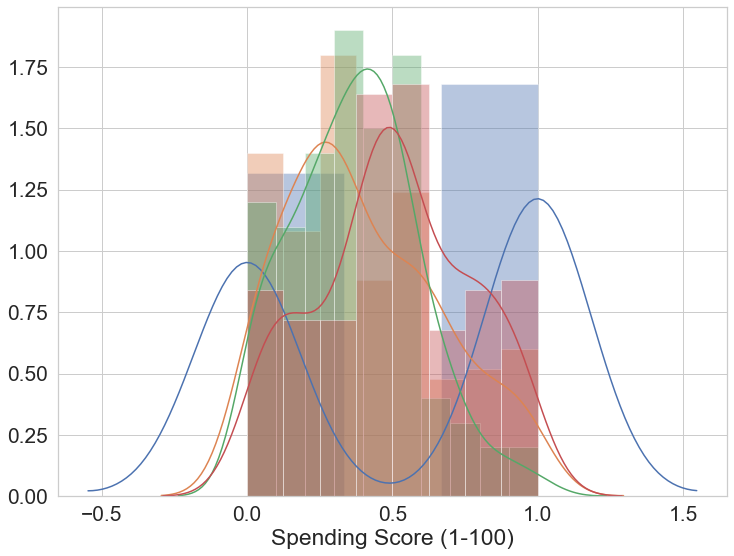

In [7]:
plt.figure(figsize=(12,9))
sns.distplot(df_scaled[features[0]])
sns.distplot(df_scaled[features[1]])
sns.distplot(df_scaled[features[2]])
sns.distplot(df_scaled[features[3]])

<Figure size 864x648 with 0 Axes>

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B7FC0A588>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

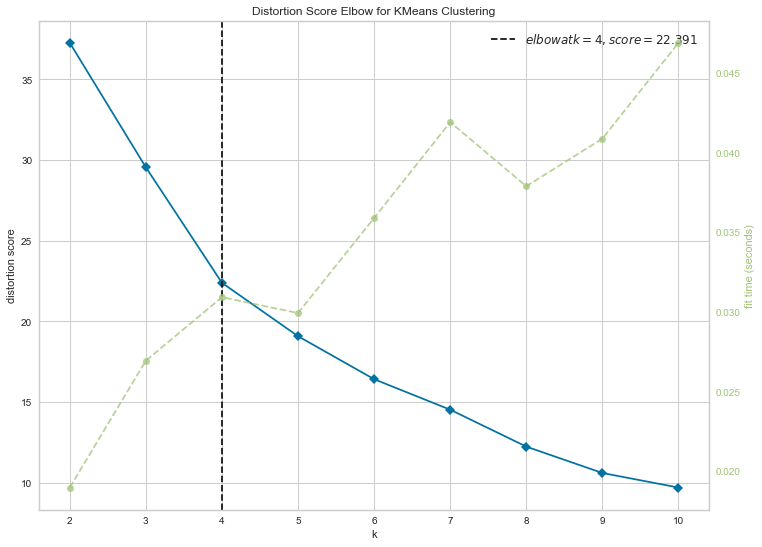

#### We find that 4 Clusters seem to be the optimal amount, hence lets Cluster and look at the Silhouette ####


In [8]:
#First we want to determine the number of clusters that we need by using the ElbowMethod and KMeans for Clustering
#and looking where the learning-tradeoff is the optimal
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(12,9))

visualizer = KElbowVisualizer(model=KMeans())
visualizer.fit(df_scaled)
visualizer.show()
print("#### We find that 4 Clusters seem to be the optimal amount, hence lets Cluster and look at the Silhouette ####")

<Figure size 864x648 with 0 Axes>

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B007AA780>,
                     colors='yellowbrick', is_fitted='auto', model=None)

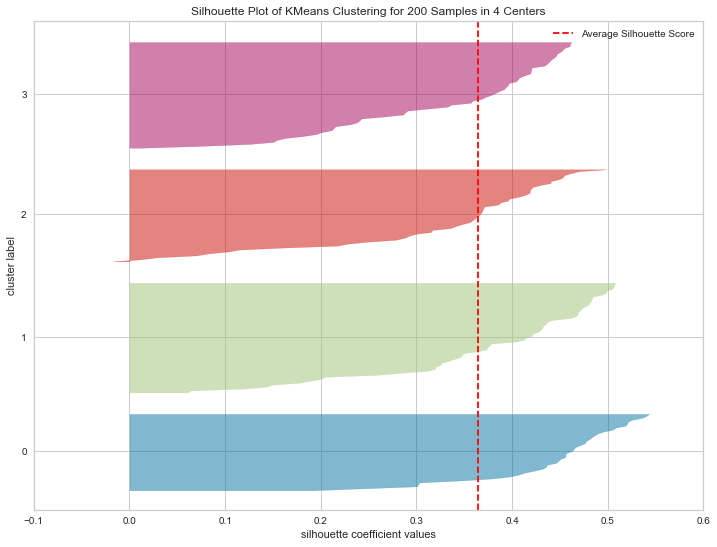

In [9]:
# Now we use Silhoutte to visualize the compactness of the clusters

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.model_selection import LearningCurve

plt.figure(figsize=(12,9))

visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=3), colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

# We find 4 evenly spread clusters, which are all similar in size and clear the line of the average silhouette Score
# Therefore we can assume that we clustered effectively

<Figure size 864x648 with 0 Axes>

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B007A4898>,
                     embedding='mds', is_fitted='auto', legend=True,
                     legend_loc='lower left', legend_size=1.5, max_size=25000,
                     min_size=10000, model=None, random_state=None,
                     scoring='membership')

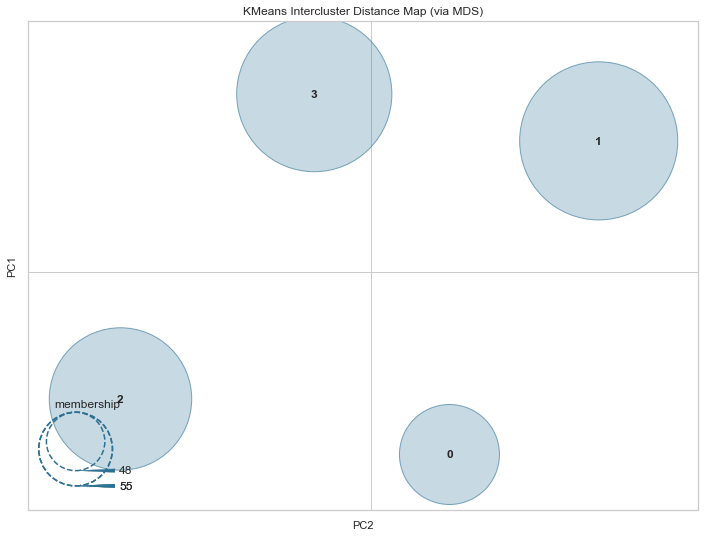

we find that none of the clusters overlap and the memberships seem to be clearly defined


In [10]:
# next up we want to look at the intra cluster distance
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
from yellowbrick.cluster import InterclusterDistance

plt.figure(figsize=(12,9))

visualizer = InterclusterDistance(KMeans(4, random_state=3), min_size=10000)
visualizer.fit(df_scaled)
visualizer.show()

print("we find that none of the clusters overlap and the memberships seem to be clearly defined")

In [11]:
# finally we want to evaluate our clusters by looking at the silhouette score and the model inertia
from sklearn import metrics

model = KMeans(4)
model1 = model.fit(df_scaled)

#Model KMeans with 4 clusters
she=metrics.silhouette_score(df_scaled, model1.labels_, metric="euclidean")
print(f'Silhouette score {she:5f}')

model1.inertia_

print(f'Inertia KMeans: {round(model1.inertia_, 2)}')

# We can see that the metrics of our models are predicting a relatively good fit 

Silhouette score 0.364166


22.39096001192855

Inertia KMeans: 22.39


In [12]:
#Business Interpretation
df_cluster = pd.concat([df_scaled, pd.DataFrame(model.labels_, columns=['cluster'])], axis=1)
df_cluster.head()
df_cluster.columns

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0.0,0.019231,0.000000,0.387755,2
1,0.0,0.057692,0.000000,0.816327,2
2,1.0,0.038462,0.008197,0.051020,0
3,1.0,0.096154,0.008197,0.775510,3
4,1.0,0.250000,0.016393,0.397959,3


Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')

In [30]:
#lets look at the clusters independently and compare features
cluster1 = df_cluster.loc[df_cluster['cluster']==0]
cluster2 = df_cluster.loc[df_cluster['cluster']==1]
cluster3 = df_cluster.loc[df_cluster['cluster']==2]
cluster4 = df_cluster.loc[df_cluster['cluster']==3]

print("cluster 1:")
cluster1.describe()

#cluster 1 are females, which are above average in age, but spend below average

print("cluster 2:")
cluster2.describe()

#cluster 2 are males who are also older and spend below average

print("cluster 3:")
cluster3.describe()

#cluster 3 are young males, who spend the most on average

print("cluster 4:")
cluster4.describe()

#cluster 4 are young females, who spend the more than average

cluster 1:


,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
count,55.0,55.000000,55.000000,55.000000,55.0
mean,1.0,0.579021,0.359165,0.344712,0.0
std,0.0,0.189172,0.211245,0.168011,0.0
min,1.0,0.038462,0.008197,0.040816,0.0
25%,1.0,0.451923,0.213115,0.204082,0.0
50%,1.0,0.596154,0.344262,0.387755,0.0
75%,1.0,0.692308,0.483607,0.484694,0.0
max,1.0,0.961538,0.909836,0.591837,0.0


cluster 2:


,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
count,48.0,48.000000,48.000000,48.000000,48.0
mean,0.0,0.604567,0.388661,0.287840,1.0
std,0.0,0.269783,0.202429,0.196595,0.0
min,0.0,0.019231,0.032787,0.000000,1.0
25%,0.0,0.423077,0.254098,0.109694,1.0
50%,0.0,0.586538,0.389344,0.316327,1.0
75%,0.0,0.793269,0.516393,0.461735,1.0
max,0.0,1.000000,1.000000,0.602041,1.0


cluster 3:


,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
count,40.0,40.000000,40.000000,40.000000,40.0
mean,0.0,0.197115,0.385246,0.721173,2.0
std,0.0,0.134139,0.238670,0.170690,0.0
min,0.0,0.000000,0.000000,0.387755,2.0
25%,0.0,0.072115,0.213115,0.584184,2.0
50%,0.0,0.192308,0.393443,0.734694,2.0
75%,0.0,0.293269,0.516393,0.892857,2.0
max,0.0,0.423077,1.000000,0.979592,2.0


cluster 4:


,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
count,57.0,57.000000,57.000000,57.000000,57.0
mean,1.0,0.200742,0.366120,0.680451,3.0
std,0.0,0.105645,0.216916,0.190941,0.0
min,1.0,0.000000,0.008197,0.285714,3.0
25%,1.0,0.096154,0.196721,0.510204,3.0
50%,1.0,0.230769,0.385246,0.734694,3.0
75%,1.0,0.269231,0.516393,0.836735,3.0
max,1.0,0.423077,0.860656,1.000000,3.0


In [34]:
print("We can see that cluster 2 and 4 are younger, while 0 and 1 are older")
print("Income is spread evenly across the 4 clusters")
print("The clusters are split by gender completely, hence target male and female independently")
print("males also spend a little more than females, hence it makes sense to target young males in particular")
print("Our marketing department should target males and females independently and target the younger people in their\ncampaings as they seem to have a higher spending score, however the same income as our older customers")

We can see that cluster 2 and 4 are younger, while 0 and 1 are older
Income is spread evenly across the 4 clusters
The clusters are split by gender completely, hence target male and female independently
males also spend a little more than females, hence it makes sense to target young males in particular
Our marketing department should target males and females independently and target the younger people in their
campaings as they seem to have a higher spending score, however the same income as our older customers


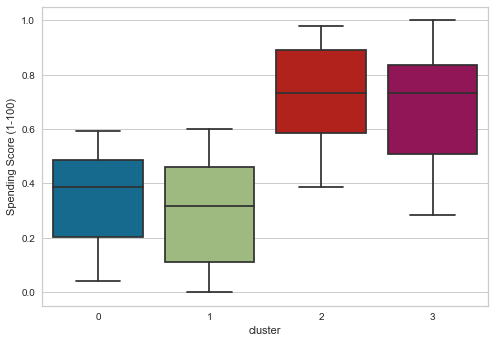

In [16]:
# Create Boxplots per cluster
sns.boxplot(data=df_cluster, x='cluster' ,y="Spending Score (1-100)")

#The Boxplot confirms, that Spending score in cluster 2 and 3 are higher than in 0 and 1

Text(0.5, 1, 'Correlation between Age and Spending Score ')

Text(0.5, 8.959999999999994, 'Age')

Text(6.209999999999994, 0.5, 'Spending Score')

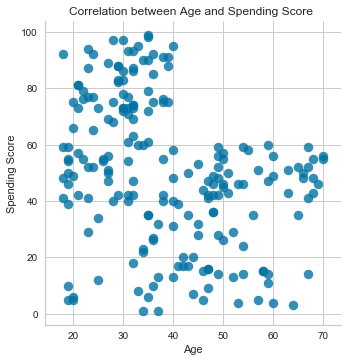

we can see a negative correlation between Spending Score and Age 
this means that a younger customer is likely to spend more money


In [17]:
# Create scatterplot of dataframe
sns.lmplot('Age',
           'Spending Score (1-100)', 
           data=df, 
           fit_reg=False, 
           scatter_kws={"marker": "D", 
                        "s": 90})
# Set title
plt.title('Correlation between Age and Spending Score ')

# Set x-axis label
plt.xlabel('Age')

# Set y-axis label
plt.ylabel('Spending Score')

# Show graph
plt.show()

print("we can see a negative correlation between Spending Score and Age \nthis means that a younger customer is likely to spend more money")

In [35]:
print("further visualisation confirms the raw interpretation of the data and our recommendation to the marketing department")

further visualisation confirms the raw interpretation of the data and our recommendation to the marketing department


<h1>2) Clustering -2 </h1>

Use the same dataset with an alternative clustering algorithm (hierarchical if you used k-means before or viceversa) and comment the results. Are there significant differences?

Please print the dendograms. 

Did you find significative differences when using an alternative method (eg. size of clusters,... )? Please commment! 

Do you think the Dendogram could add value and explainability to the marketing department?



<Figure size 1224x648 with 0 Axes>

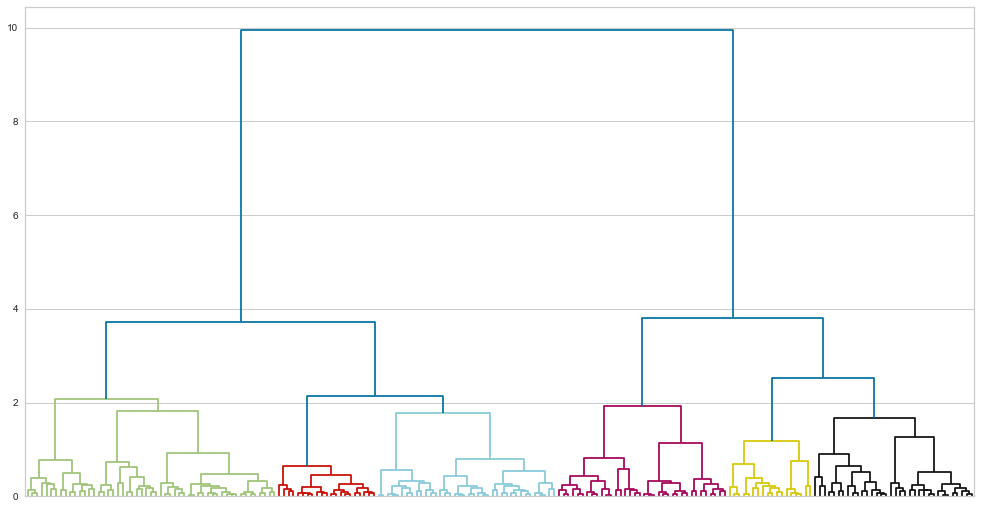

predictions --- 


array([0, 2, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 0, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2], dtype=int64)

labels --- 


array([0, 2, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 0, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2], dtype=int64)

In [19]:
# I will be using the same model, with 4 clusters
import scipy.cluster.hierarchy as sch
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


plt.figure(figsize=(17,9))

dn = sch.dendrogram(sch.linkage(df_scaled, method='ward'), 
                    no_labels=True, 
                    color_threshold=2.08)
plt.show()

#create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart y_hc = hc.fit_predict(points)
print("predictions --- ")
y_hc = hc.fit_predict(df_scaled)
y_hc

print("labels --- ")
hc.labels_

In [37]:
print("I think the Dendrogramm does not explain the clustering very well to the marketing department,\nas you cannot see what the decisions and splits are based on")

I think the Dendrogramm does not explain the clustering very well to the marketing department,
as you cannot see what the decisions and splits are based on


<h1>3) Classification - 1</h1>
<img src="Bank_Churn.png">

You have a dataset of Bank customers (Bank_Churn.csv) with 10K customers and 14 attributes, some of them useless such as "surename". The last atrribute tells us if they left the bank or not. This is called customer churn, which is when a customer ceases the relationship with a company. Obviously a major priority for any business is to avoid or at least reduce churn. 

Our first job is to understand why these customers leave. 

Our first attempt to do this will be knowing the importance of each feature for predicting churn. You are asked to use any tree ensamble algorithm that you wish (RandomForest, ExtraTrees, ... ) and produce an histogram using scikit-learn conventions that describes the importance of each feature.

After this you must add a written comment for the marketing department. 

Please, keep in mind that this is an unbalanced dataset. Fortunately, most of the clients don't leave the bank! 


In [20]:
# PREPROCESSING & MODEL SELECTION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score

# PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns

# STANDARD MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# ENSEMBLE
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# XGBOOST
from xgboost import XGBClassifier

In [21]:
#read the dataset
df2 = pd.read_csv("Bank_Churn.csv")
df2.head()
df2.nunique()

#convert gender into dummies
df2['Gender'] = pd.get_dummies(df2['Gender'], dtype='int64')

#check consistency
print(df2.isnull().sum()/len(df2)) 

#drop Strings we dont need
df2 = df2.drop(["CustomerId", "RowNumber", "Surname"], 1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64


In [22]:
#convert categoricals
def binarize_categories(data):
    for column in data.select_dtypes('object'):
        if len(data[column].unique()) == 2:
            data[column] = pd.get_dummies(data[column], dtype='int64')
        else:
            data = pd.get_dummies(data, prefix=column, columns=[column], drop_first=True, dtype='int64')
    return data

df2 = binarize_categories(df2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Gender               10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_Germany    10000 non-null int64
Geography_Spain      10000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [23]:
#split the Dataset
df2.columns
X = df2.drop("Exited",1).values
y = df2["Exited"].values

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

Random Forest - Accuracy 86.340% std 0.645900


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

CreditScore      0.1439
Gender           0.0180
Age              0.2405
Tenure           0.0816
Balance          0.1425
NumOfProducts    0.1307
HasCrCard        0.0184
IsActiveMember   0.0402
EstimatedSalary  0.1454
Exited           0.0258
Geography_Germany  0.0130


<Figure size 1080x648 with 0 Axes>

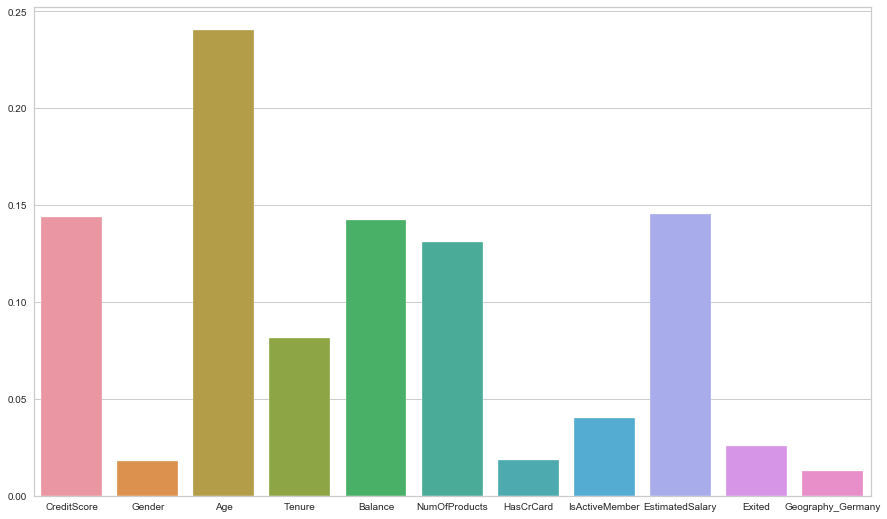

In [24]:
# because this is an unbalanced dataset, we will be using Stratified KFold
from sklearn.model_selection import StratifiedKFold


# Create the DataFrames for plotting
resall=pd.DataFrame()
res_w1=pd.DataFrame()

# Random Forest
seed=7

kfold=StratifiedKFold(n_splits=10, random_state=seed)

num_trees=100
num_features=3

model=RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)

print(f'Random Forest - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="Random Forest"

resall=pd.concat([resall,res_w1], ignore_index=True)

model.fit(X,y)

for name, importance in zip(df2.columns, model.feature_importances_):
    print(f'{name:15s}  {importance:.4f}')


plt.figure(figsize=(15,9))
sns.barplot(x=df2.columns[:-1], y=model.feature_importances_)


In [25]:
# in order to prevent the customer from churning,the most important feature is age
# Next most important are the Estimated Salary, 
# Creditscore and their Balance, however neither of these features we can influence well

# However all these features ought to be considered in the churn-prevention strategy

# 4) Classification - 2

The marketing department seems to be very happy with your work and asks for further details. 

This time you are asked to produce a Decision Tree with the objective of having an educated guess on the accuracy of the model that can be produced in order to prevent, or at least attempt to prevent, churn. 

Together with that you are asked to print the first 3 levels of the tree and comment them. The objective is no other than to be fully aware of the main conditions that drive churn. 

This second part can be done with scikit-learn or BigML (just copy and paste the resulting images) as you wish. 


In [41]:
def evaluate_classifiers(X, y, n_splits=10, shuffle=True, random_state=0):
    X_std = StandardScaler().fit_transform(X)
    X_minmax = MinMaxScaler().fit_transform(X)
    
    features = [('Normal',       X), 
                ('Standardized', X_std), 
                ('MinMax',       X_minmax)]
    
    models = [('DecisionTreeClassifier',     DecisionTreeClassifier())]
    
    kfold = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    
    results = []
    for model in models:
        
        for feature in features:
            res = cross_val_score(model[1], feature[1], y, cv=kfold)
            
            [results.append((model[0], feature[0], model[0]+'_'+feature[0], r)) for r in res]
    
    results = pd.DataFrame(results, columns=['Model', 'FeatureScaling', 'Combined', 'Result'])
    return results

<Figure size 1080x648 with 0 Axes>

[Text(0, 0, 'DecisionTreeClassifier_Normal'),
 Text(0, 0, 'DecisionTreeClassifier_Standardized'),
 Text(0, 0, 'DecisionTreeClassifier_MinMax')]

Churn Model Results:


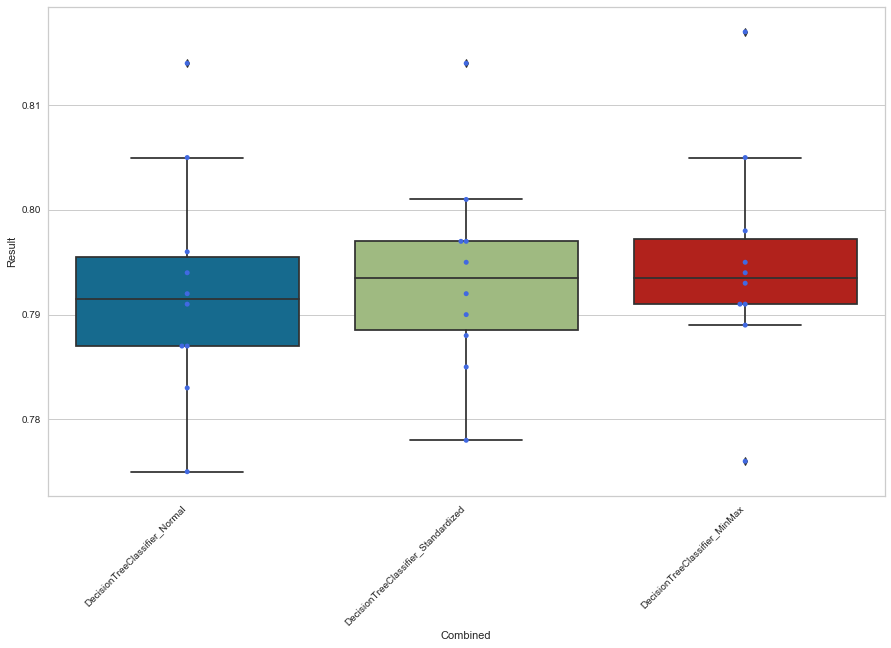

In [44]:
results = evaluate_classifiers(X, y)

plt.figure(figsize=(15,9))
chart = sns.boxplot(data=results, x='Combined', y='Result')
chart = sns.swarmplot(data=results, x='Combined', y='Result', color="royalblue")
chart.set_xticklabels(labels=results['Combined'].unique(), rotation=45, horizontalalignment='right')

print('Churn Model Results:')

In [40]:
# we will use the decisiontree classifier with a MinMax-rescaled features as it gives us the lowest std
# while only marginally compromisingg the accuracy

X_MinMax = MinMaxScaler().fit_transform(X)

seed=7

kfold=StratifiedKFold(n_splits=10, random_state=seed)

model=DecisionTreeClassifier(class_weight="balanced", random_state=seed)

results_scl=cross_val_score(model, X_MinMax, y, cv=kfold)

print(f'Decision Tree (MinMax) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')
print("we can classify a customer that will churn with an accuracy of 79.81%")

Decision Tree (MinMax) - Accuracy 79.810% std 1.077412
we can classify a customer that will churn with an accuracy of 79.81%


In [45]:
#we create the general fuction for data trees. It's in Esteve's info
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# function that creates a tree classifier for us
def create_tree(x, y, max_features=None):
    data_tree=DecisionTreeClassifier(max_depth=2)
    data_tree.fit(x,y)
    return data_tree

# function that plots our classified tree
def print_tree(data_tree, feature_names, class_names):
    dot_data = StringIO()
    export_graphviz(data_tree, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=feature_names,
                class_names=class_names,
                special_characters=True)

    data_tree_graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(data_tree_graph.create_png())

C:\Users\Daniel Beck\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


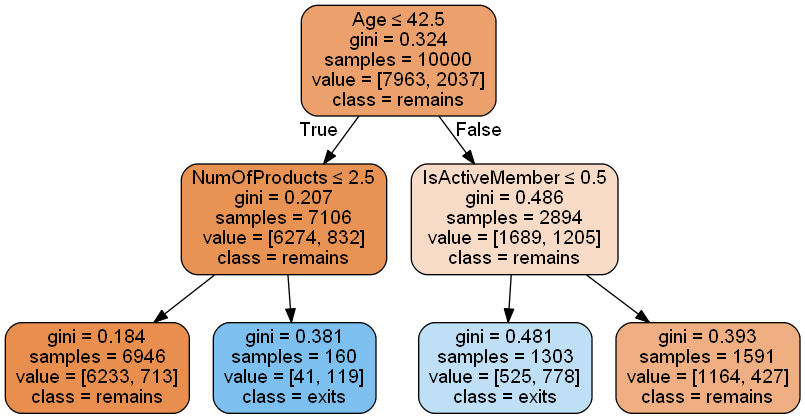

In [46]:
#create the tree
X1 = df2.drop("Exited",1)
feature_names = list(X1.columns)
class_names = ['remains', 'exits']

#print the tree
tree1 = create_tree(X, y)
print_tree(tree1, feature_names, class_names)

# it seems like the best dividor to predict churn is age, more specifically, when someone is above 42.5 years old
# the next best split, given that they are above 42.5 years of age is the number of Products tey are subscribed to
# if this number exceeds 2.5 Products, then they are more likely to stay

# for the younger people (below 42.5 years) it is more important that they are active, so if they are inactive, 
# they are more likely to stay, but if they are active, they are more likely to churn

# 5) Classification - 3 

The marketing department is really happy with your work and wants to put it into production. Firstly, with weekly alams to branch directors flagging the customers that could potentially leave. 

In order to implement this they ask you a more refined version using a Random Forest, in Python, together with the model saved with Pickle (you don't need to upload the model to the moodle, just the code). 

You also have to provide the accuracy with a k-fold estimation, together with the standard deviation of the accuracy. 



In [53]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

seed=7

#my Kfold is still Stratified, given the unqual distribution of the groups
kfold=StratifiedKFold(n_splits=10, random_state=seed)

num_trees=100
num_features=3

model=RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)
print(f'Random Forest - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="Random Forest"

resall=pd.concat([resall,res_w1], ignore_index=True)


Random Forest - Accuracy 86.340% std 0.645900


In [54]:
from sklearn.linear_model import LogisticRegression

from pickle import dump
from pickle import load

#Now we need to fit the model
model.fit(X,y)

# Now we save it into a file
filename="exam_model.sav"
dump(model, open(filename, "wb"))

# To load the model from disk the marketing department can use this code
loaded_model=load(open(filename, "rb"))
result=loaded_model.score(X,y)

print(f'Loaded model (Random Forest) - Accuracy {result.mean()*100:.3f}% std {results.std()*100:3f}')


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

Loaded model (Random Forest) - Accuracy 100.000% std 0.645900


# 6) Classification - 4

Somebody in the marketing department heard of a new algorithm called XGBoost that seems to be the best, or among the best, for this type of work !!! 

Of course, they ask you to try it and compare with the previous results. 

Therefore, you have to produce a classification with XGBoost and report the accuracy with k-fold providing also the standard deviation of the accuracy. 

If you have some time left, you can try to tune the model in order to report the best possible accuracy. 


In [49]:

# XGBoost 
from xgboost import XGBRegressor
import xgboost as xgb


learner=xgb.XGBClassifier()

#my Kfold is still Stratified, given the unqual distribution of the groups
results=cross_val_score(learner, X, y, cv=kfold)

print(f'XGBoost with Stratifiedkfold - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')
print("\nWe are able to slightly increase the Accuracy of our model, however this comes at the expense\nof an increased standard deviation and computing power")

XGBoost with Stratifiedkfold - Accuracy 86.410% std 0.932826

We are able to slightly increase the Accuracy of our model, however this comes at the expense
of an increased standard deviation and computing power


Grid Best Score 0.8646000       Number of trees 200       Max Depth of Decision Trees   9

N. estimators  50             Depth   1 accuracy 0.7963000 (0.00034)
N. estimators 100             Depth   1 accuracy 0.7963000 (0.00034)
N. estimators 150             Depth   1 accuracy 0.7963000 (0.00034)
N. estimators 200             Depth   1 accuracy 0.7963000 (0.00034)
N. estimators 250             Depth   1 accuracy 0.7963000 (0.00034)
N. estimators 300             Depth   1 accuracy 0.7963000 (0.00034)
N. estimators  50             Depth   2 accuracy 0.8103000 (0.00319)
N. estimators 100             Depth   2 accuracy 0.8072000 (0.00244)
N. estimators 150             Depth   2 accuracy 0.8070000 (0.00253)
N. estimators 200             Depth   2 accuracy 0.8081000 (0.00282)
N. estimators 250             Depth   2 accuracy 0.8072000 (0.00261)
N. estimators 300             Depth   2 accuracy 0.8072000 (0.00261)
N. estimators  50             Depth   3 accuracy 0.8323000 (0.00619)
N. estimator

<Figure size 1080x648 with 0 Axes>

Text(0.5, 1.0, 'N. Estimators & Depth of the Decision Trees')

Text(0.5, 0, 'N. Estimators')

Text(0, 0.5, 'accuracy')

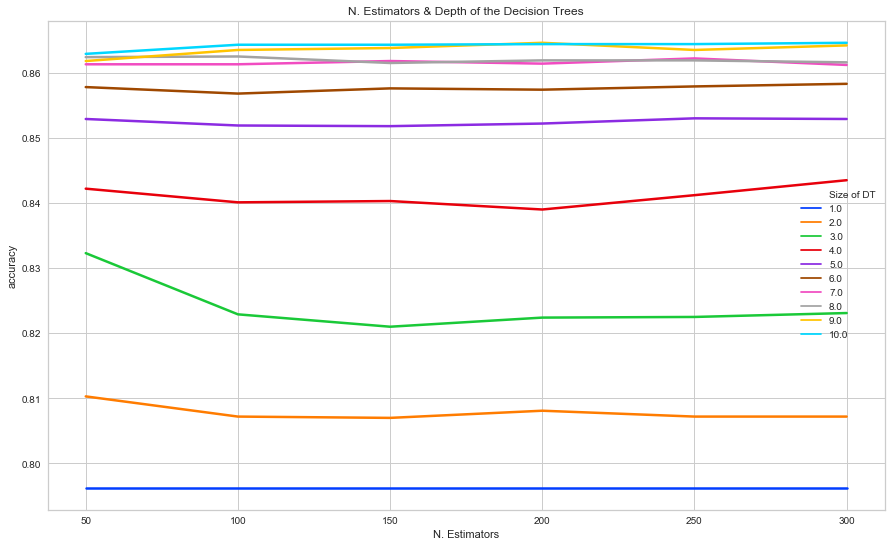

In [50]:
# So lets try to tune the model
# we will run a Grid Search to check the optimal number and size of trees
from sklearn.model_selection import GridSearchCV

param_grid={"max_depth":[1,2,3,4,5,6,7,8,9,10], "n_estimators":[50,100,150,200,250,300]}

grid=GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=kfold)
grid_result=grid.fit(X,y)

print(f'Grid Best Score {grid_result.best_score_:.7f} \
      Number of trees {grid_result.best_params_["n_estimators"]:3d} \
      Max Depth of Decision Trees {grid_result.best_params_["max_depth"]:3d}')
print()
      
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]      
params = grid_result.cv_results_["params"] 
      
tu_plot=pd.DataFrame(columns=["N estimators","Size of DT","accuracy"]) 
for mean,std,param in zip(means,stds,params):
    print(f'N. estimators {param["n_estimators"]:3d} \
            Depth {param["max_depth"]:3d} accuracy {mean:.7f} ({std:.5f})')
    tu_plot=tu_plot.append({"N estimators":param["n_estimators"],\
                            "Size of DT":param["max_depth"], "accuracy":mean}, ignore_index=True)

plt.figure(figsize=(15,9))
sns.lineplot(data=tu_plot, x=tu_plot["N estimators"], y=tu_plot["accuracy"], \
             hue=tu_plot["Size of DT"], legend="full", palette=sns.color_palette("bright") ,linewidth=2.5)
plt.title("N. Estimators & Depth of the Decision Trees")
plt.xlabel("N. Estimators")
plt.ylabel("accuracy")




In [51]:
#We can see that after tuning, it is best to select 10 trees and 200 estimators, however our accuracy only improves minimally
# so in light of overhead, it is probably not efficient to tune the model after training every time